In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data

In [2]:
base_name='../experiments/egemaps/random_forest/default/'

In [3]:
importance=glob.glob(base_name+'/*/results/data/new_partition*/importance.csv')
performance=glob.glob(base_name+'/*/results/data/new_partition*/performance.csv')
relevant_features=glob.glob(base_name+'/*/results/data/new_partition*/relevant_features.csv')

In [ ]:
import warnings
counter=0
DF_importance=pd.DataFrame({})
DF_performance=pd.DataFrame({})
DF_relevant_features=pd.DataFrame({}) 
warnings.filterwarnings('ignore')
for (i,j,k) in zip(importance,performance,relevant_features):
     
    if 'subset' in i: 
        counter+=1
        a=i.replace('-subset','_subset')    
        audio_type=a.split('/')[-2].split('-')[0]
        experiment=a.split('/')[-2].split('-')[1]
    else:
        audio_type=i.split('/')[-2].split('-')[0]
        experiment=i.split('/')[-2].split('-')[1]  
    
    df_importance=pd.read_csv(i)
    df_importance.loc[:,'audio_type']=audio_type
    df_importance.loc[:,'experiment']=experiment
    DF_importance=DF_importance.append(df_importance)

    df_performance=pd.read_csv(j)
    df_performance.loc[:,'audio_type']=audio_type
    df_performance.loc[:,'experiment']=experiment
    DF_performance=DF_performance.append(df_performance)

    df_relevant_features=pd.read_csv(k)
    df_relevant_features.loc[:,'audio_type']=audio_type
    df_relevant_features.loc[:,'experiment']=experiment
    DF_relevant_features=DF_relevant_features.append(df_relevant_features)

In [85]:
#DF_importance.to_csv('../global_results/egemaps_random_forest_default_silero_importance.csv')
#DF_performance.to_csv('../global_results/egemaps_random_forest_default_silero_performance.csv')
#DF_relevant_features.to_csv('../global_results/egemaps_random_forest_default_silero_relevant_features.csv')

Filter Results 

In [7]:
DF_performance=DF_performance[DF_performance['audio_type'].str.contains('silero|all_audio')]
DF_performance=DF_performance[~DF_performance['experiment'].str.contains('subset')]
DF_performance=DF_performance[DF_performance['experiment'].str.contains('yamnet|complete_set')].sort_values(by=['experiment'],ascending=True)

# Performance

## R²

In [15]:
r2=DF_performance[DF_performance['index']=='r2'].drop(columns='index')

r2_all=r2.loc[:,~r2.columns.isin(['O','C','E','A','N'])]
r2_O=r2.loc[:,~r2.columns.isin(['all','C','E','A','N'])]
r2_C=r2.loc[:,~r2.columns.isin(['O','all','E','A','N'])]
r2_E=r2.loc[:,~r2.columns.isin(['O','C','all','A','N'])]
r2_A=r2.loc[:,~r2.columns.isin(['O','C','E','all','N'])]
r2_N=r2.loc[:,~r2.columns.isin(['O','C','E','A','all'])]

In [22]:
DF_performance

,index,all,O,C,E,A,N,audio_type,experiment
2,MAE,0.107558,0.103713,0.116565,0.106308,0.101799,0.107930,new_partition_silero_IPU_0.25,all_audio_complete_set
1,r,0.382079,0.441233,0.307614,0.449621,0.314067,0.419127,new_partition_silero_avg_IPU_0.5,all_audio_complete_set
0,r2,0.145984,0.194686,0.094626,0.202159,0.098638,0.175668,new_partition_silero_avg_IPU_0.5,all_audio_complete_set
0,r2,0.195290,0.248850,0.171423,0.237314,0.119505,0.248967,new_partition_all_audio,all_audio_complete_set
4,RMSE,0.132936,0.128823,0.142449,0.129322,0.127681,0.134019,new_partition_silero_avg_IPU_0.25,all_audio_complete_set
...,...,...,...,...,...,...,...,...,...
4,RMSE,0.143006,0.145009,0.148513,0.141954,0.134825,0.145231,new_partition_silero_no_speech,yamnet_no_music_20+speech_rate_0.9
0,r2,0.134219,0.177613,0.108939,0.176544,0.069179,0.169877,new_partition_silero_avg_IPU_0.25,yamnet_no_music_20+speech_rate_0.9
1,r,0.366359,0.421441,0.330059,0.420171,0.263019,0.412162,new_partition_silero_avg_IPU_0.25,yamnet_no_music_20+speech_rate_0.9
3,MSE,0.018561,0.016978,0.021017,0.017592,0.017877,0.018647,new_partition_silero_avg_IPU_0.25,yamnet_no_music_20+speech_rate_0.9


In [24]:
r2_all_ss_sns=DF_performance[DF_performance['audio_type'].isin(['new_partition_all_audio','new_partition_silero_speech','new_partition_silero_no_speech'])]
r2_all_ss_sns=r2_all_ss_sns[r2_all_ss_sns['index']=='r2'].drop(columns='index')

r2_ocean_all_ss_sns=r2_all_ss_sns.loc[:,~r2_all_ss_sns.columns.isin(['O','C','E','A','N'])]

r2_O_all_ss_sns=r2_all_ss_sns.loc[:,~r2_all_ss_sns.columns.isin(['all','C','E','A','N'])]
r2_C_all_ss_sns=r2_all_ss_sns.loc[:,~r2_all_ss_sns.columns.isin(['O','all','E','A','N'])]
r2_E_all_ss_sns=r2_all_ss_sns.loc[:,~r2_all_ss_sns.columns.isin(['O','C','all','A','N'])]
r2_A_all_ss_sns=r2_all_ss_sns.loc[:,~r2_all_ss_sns.columns.isin(['O','C','E','all','N'])]
r2_N_all_ss_sns=r2_all_ss_sns.loc[:,~r2_all_ss_sns.columns.isin(['O','C','E','A','all'])]

### All

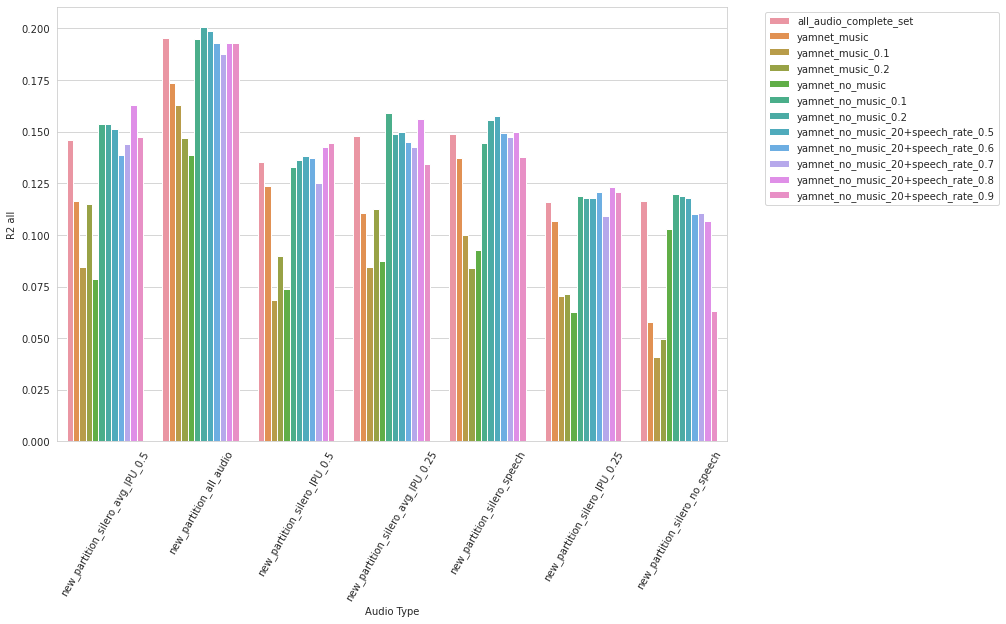

In [99]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=r2_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 all')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

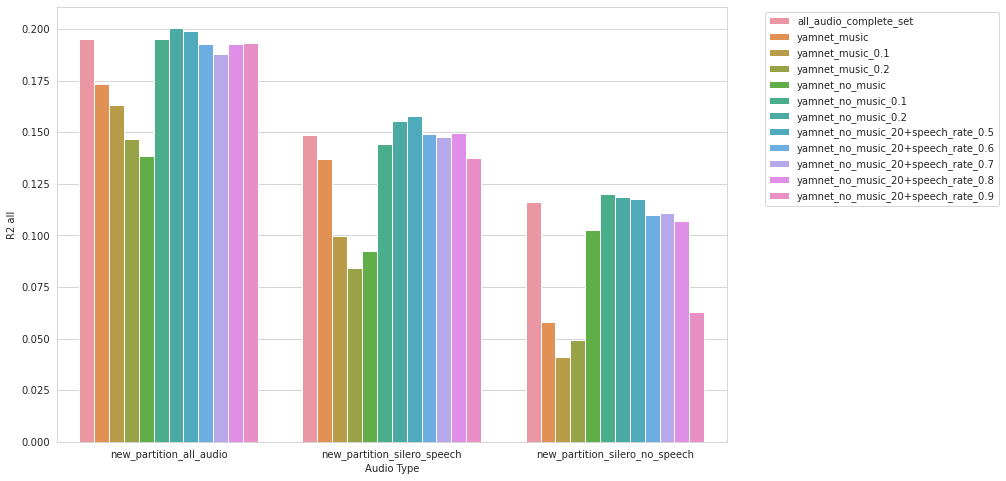

In [25]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=r2_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

All audio only

In [28]:
r2_all_audio=r2_all[r2_all['audio_type']=='new_partition_all_audio']

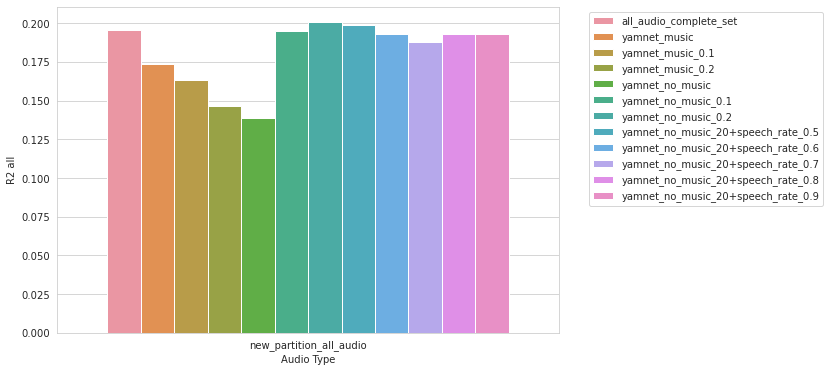

In [29]:
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=r2_all_audio,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 all')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Openness

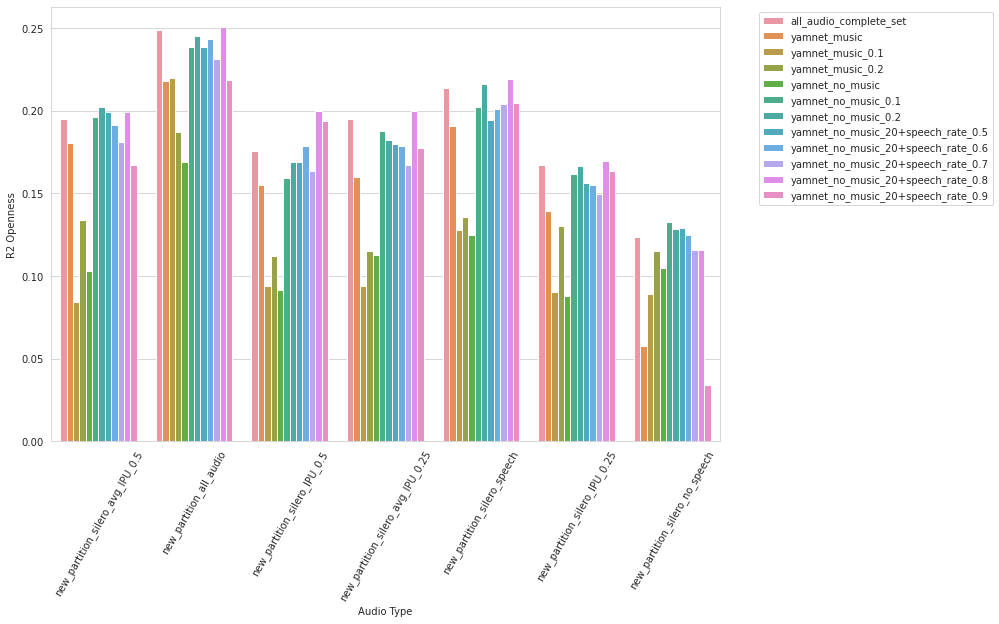

In [100]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=r2_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Openness')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

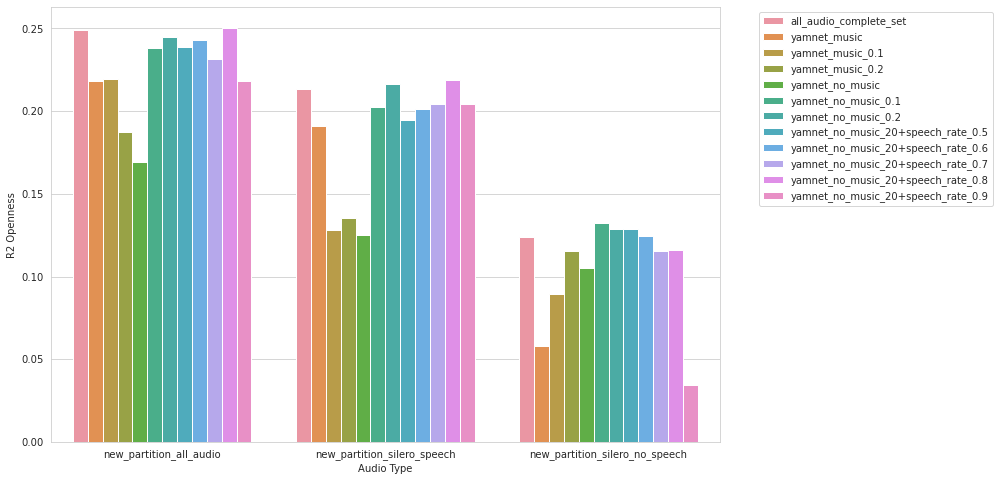

In [102]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=r2_O_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Openness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Conscienciousness

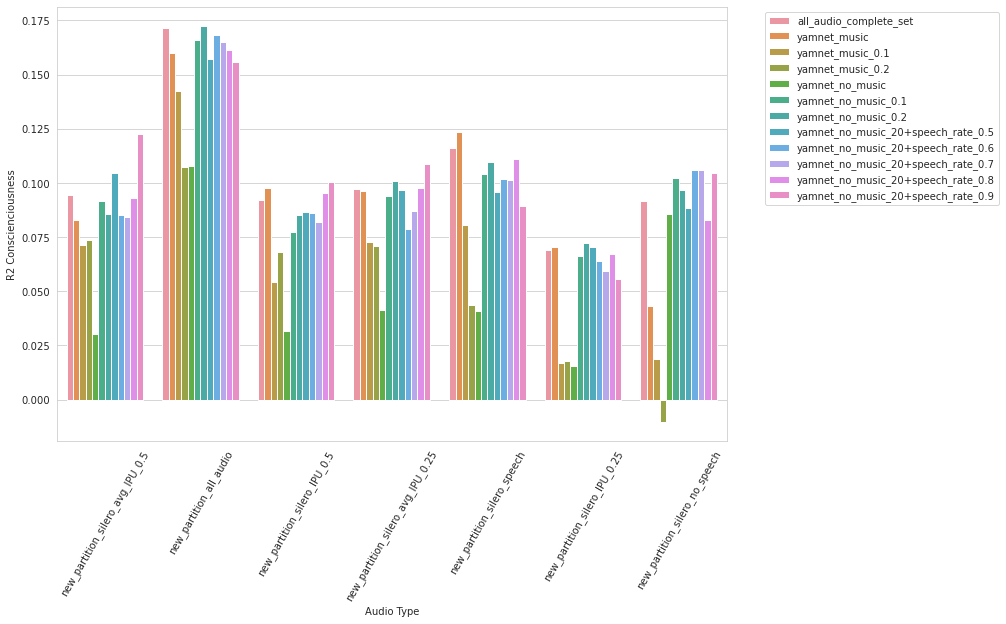

In [103]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=r2_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Conscienciousness')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

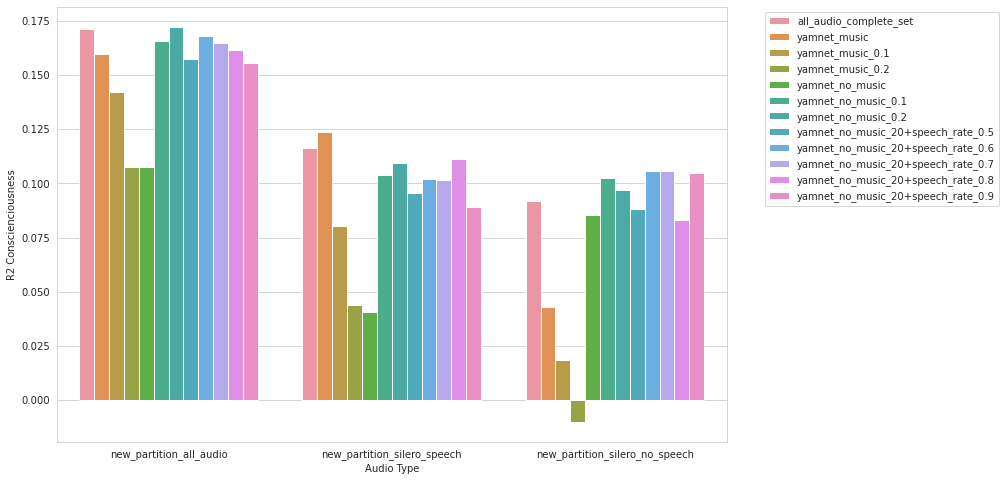

In [72]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=r2_C_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Conscienciousness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Extraversion

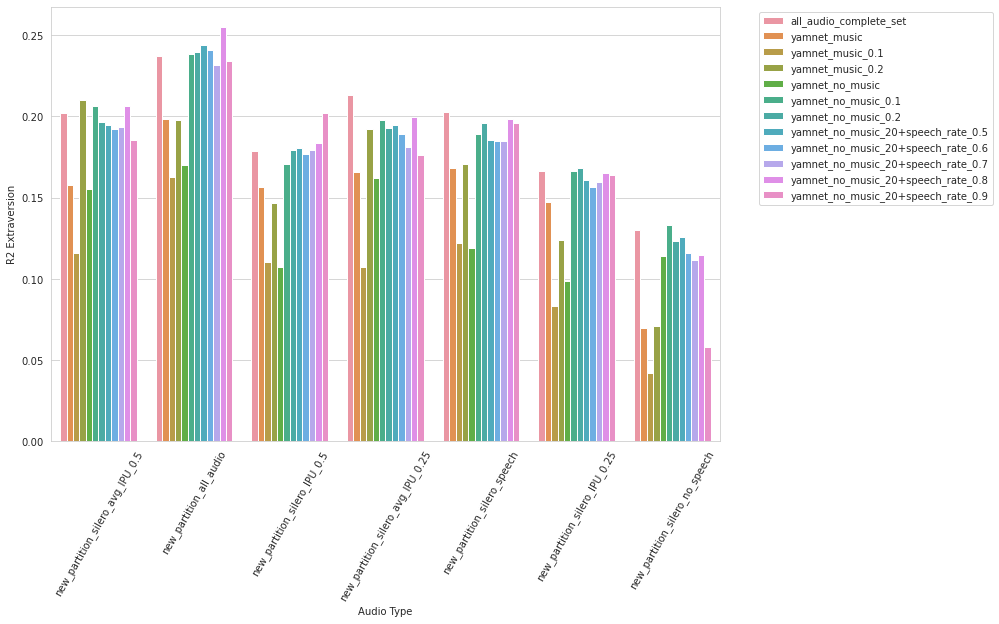

In [104]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=r2_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Extraversion')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

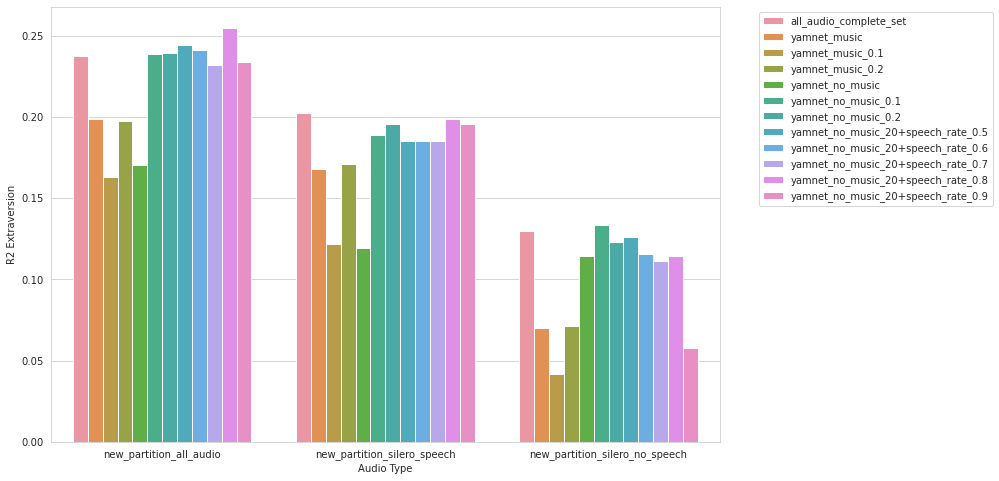

In [84]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=r2_E_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Extraversion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Agreeableness

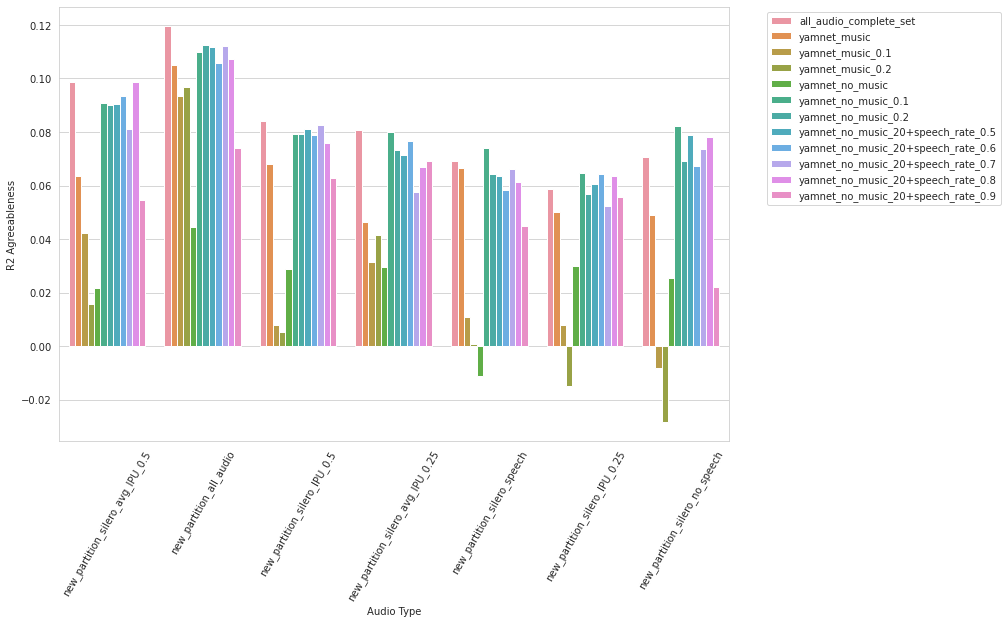

In [105]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=r2_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Agreeableness')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

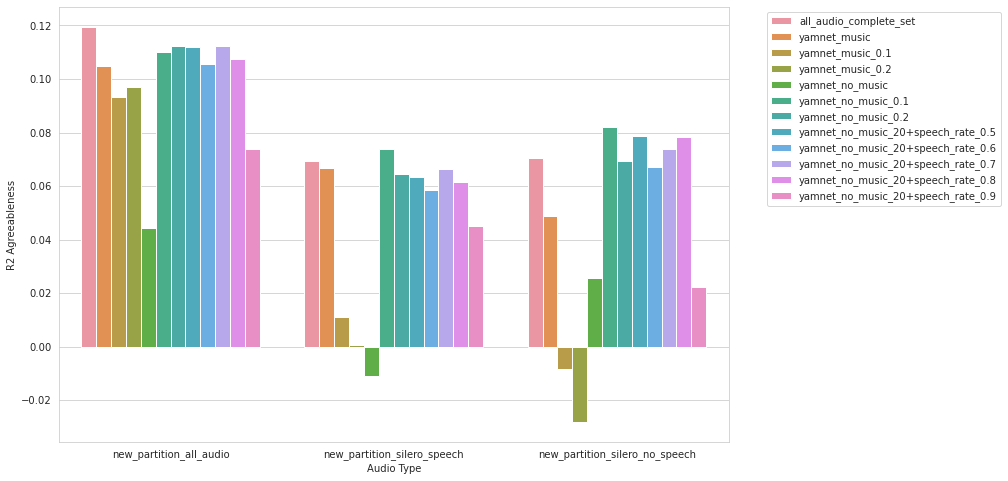

In [85]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=r2_A_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Agreeableness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Neuroticism

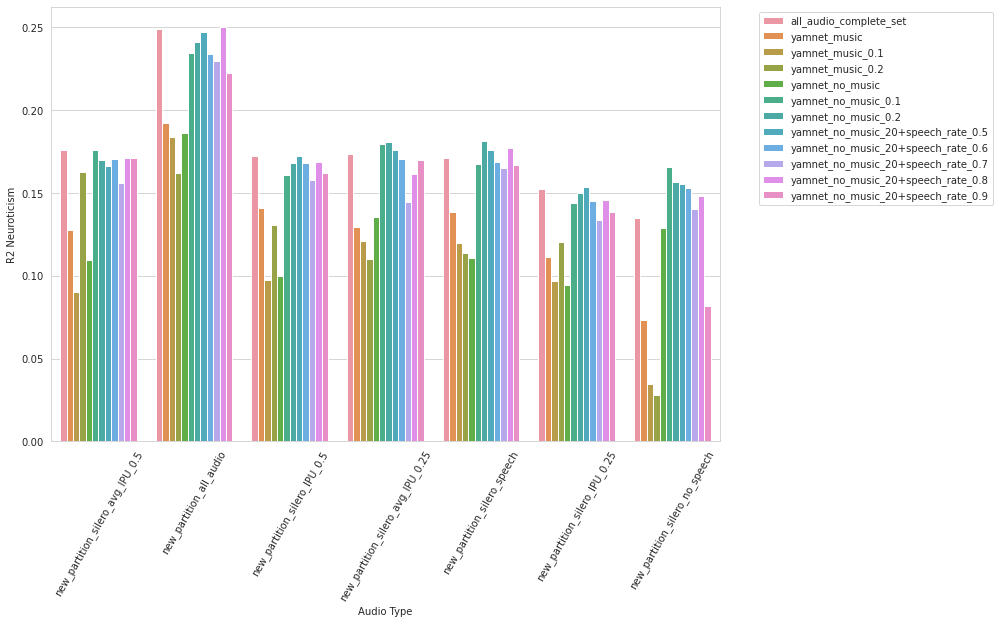

In [106]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=r2_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Neuroticism')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

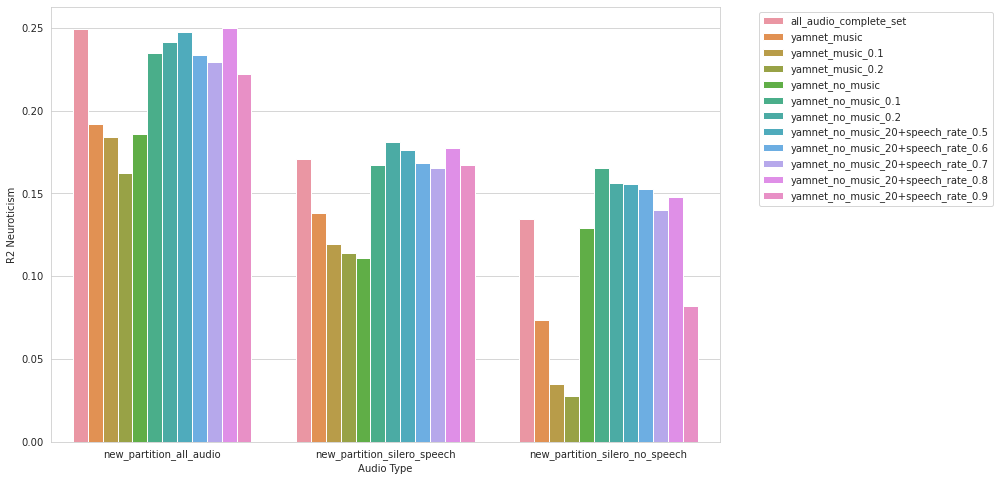

In [86]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=r2_N_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R2 Neuroticism')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## R

In [35]:
r=DF_performance[DF_performance['index']=='r'].drop(columns='index')

r_all=r.loc[:,~r.columns.isin(['O','C','E','A','N'])]
r_O=r.loc[:,~r.columns.isin(['all','C','E','A','N'])]
r_C=r.loc[:,~r.columns.isin(['O','all','E','A','N'])]
r_E=r.loc[:,~r.columns.isin(['O','C','all','A','N'])]
r_A=r.loc[:,~r.columns.isin(['O','C','E','all','N'])]
r_N=r.loc[:,~r.columns.isin(['O','C','E','A','all'])]

In [77]:
r_all_ss_sns=DF_performance[DF_performance['audio_type'].isin(['new_partition_all_audio','new_partition_silero_speech','new_partition_silero_no_speech'])]
r_all_ss_sns=r_all_ss_sns[r_all_ss_sns['index']=='r'].drop(columns='index')

r_ocean_all_ss_sns=r_all_ss_sns.loc[:,~r_all_ss_sns.columns.isin(['O','C','E','A','N'])]

r_O_all_ss_sns=r_all_ss_sns.loc[:,~r_all_ss_sns.columns.isin(['all','C','E','A','N'])]
r_C_all_ss_sns=r_all_ss_sns.loc[:,~r_all_ss_sns.columns.isin(['O','all','E','A','N'])]
r_E_all_ss_sns=r_all_ss_sns.loc[:,~r_all_ss_sns.columns.isin(['O','C','all','A','N'])]
r_A_all_ss_sns=r_all_ss_sns.loc[:,~r_all_ss_sns.columns.isin(['O','C','E','all','N'])]
r_N_all_ss_sns=r_all_ss_sns.loc[:,~r_all_ss_sns.columns.isin(['O','C','E','A','all'])]

### All

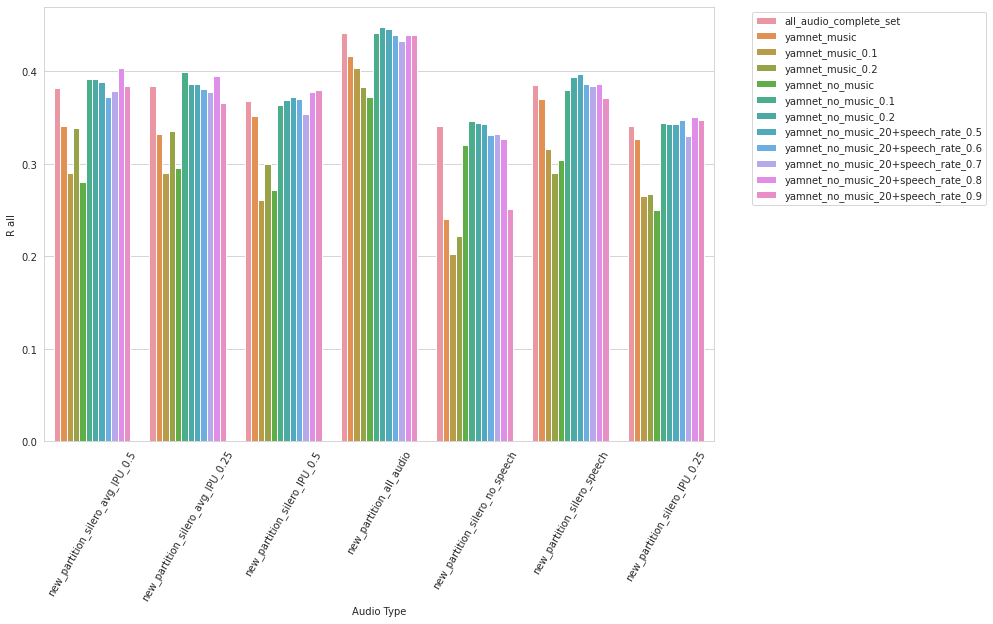

In [107]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=r_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R all')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Openness

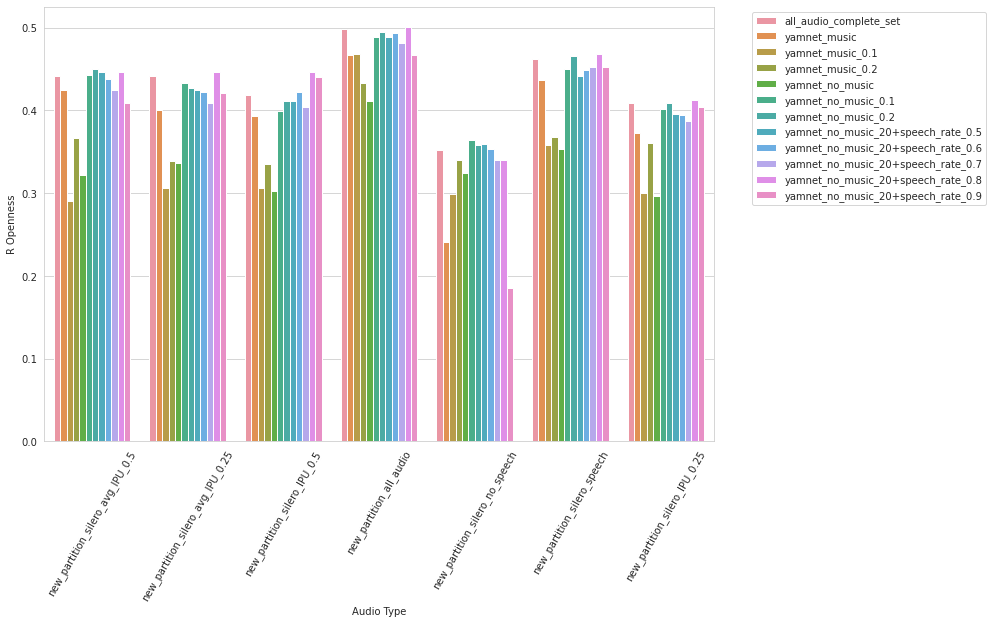

In [108]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=r_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Openness')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

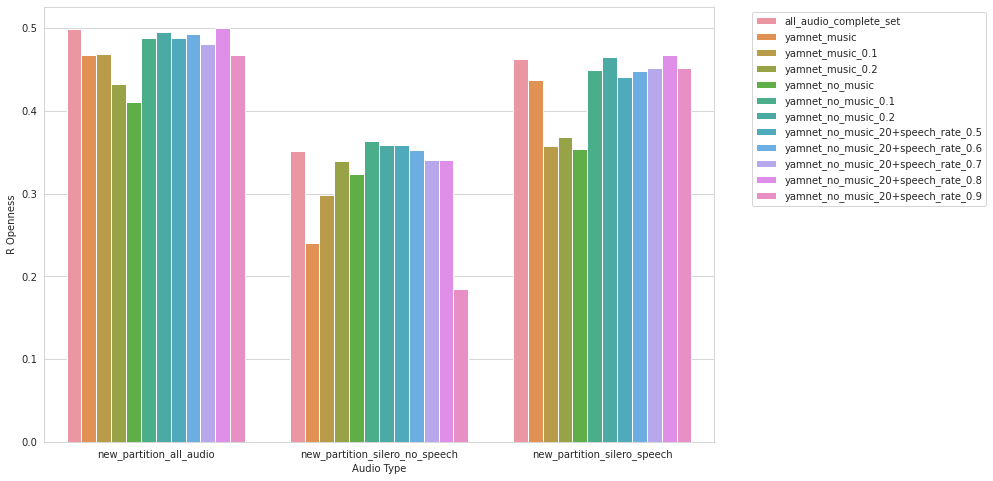

In [79]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=r_O_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Openness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Conscienciousness

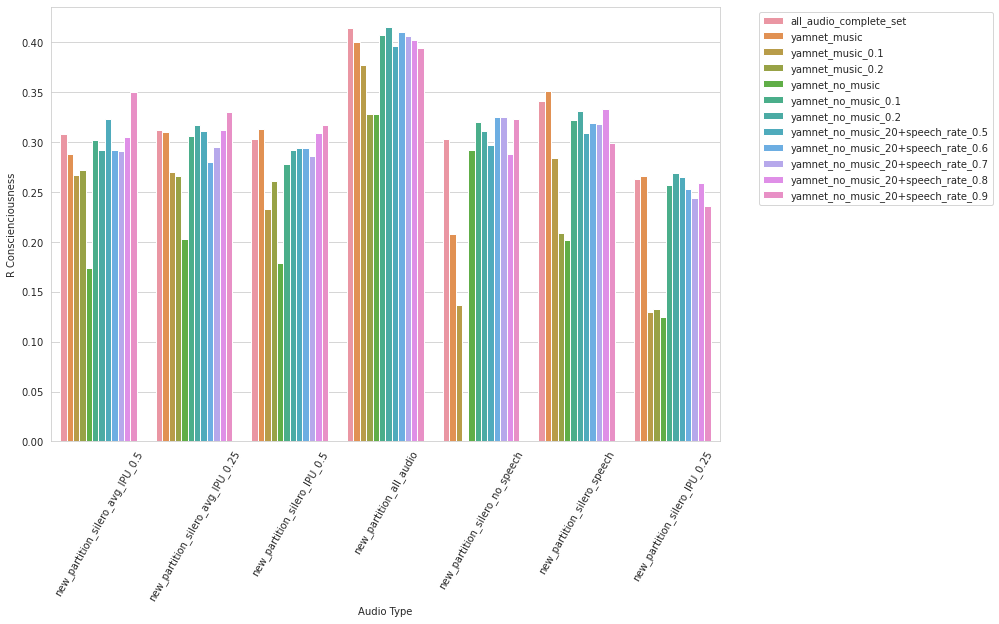

In [109]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=r_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Conscienciousness')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

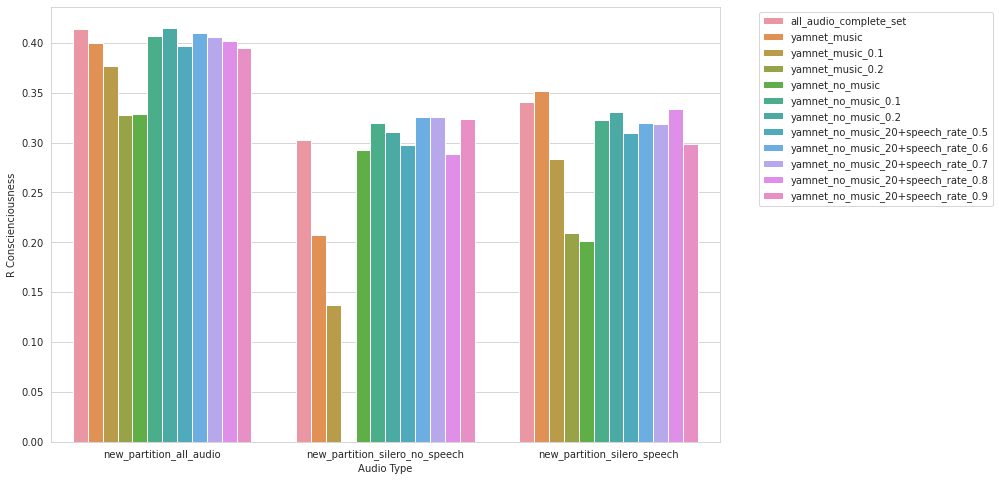

In [80]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=r_C_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Conscienciousness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Extraversion

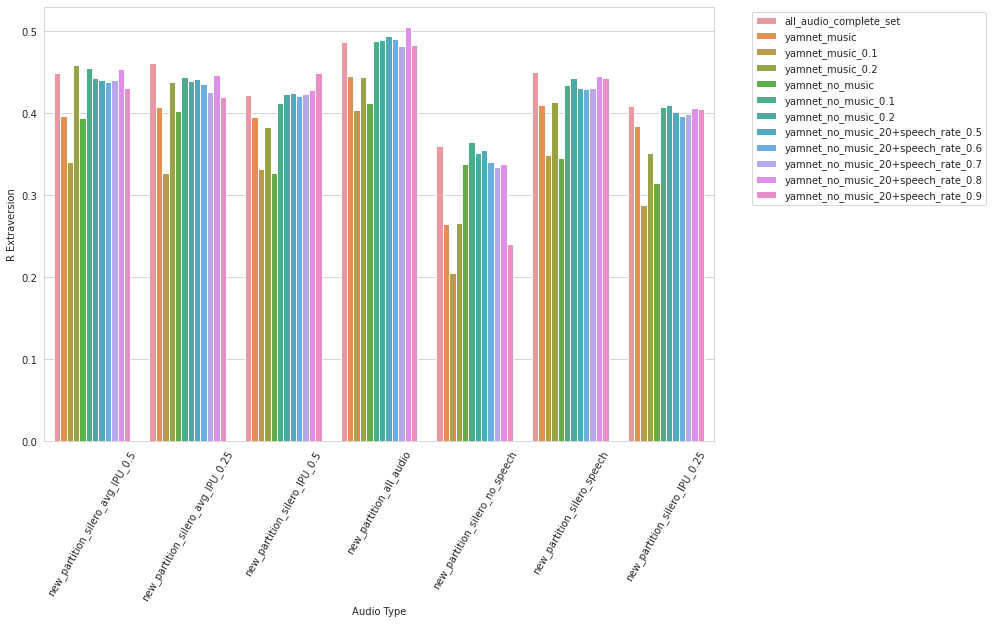

In [110]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=r_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Extraversion')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

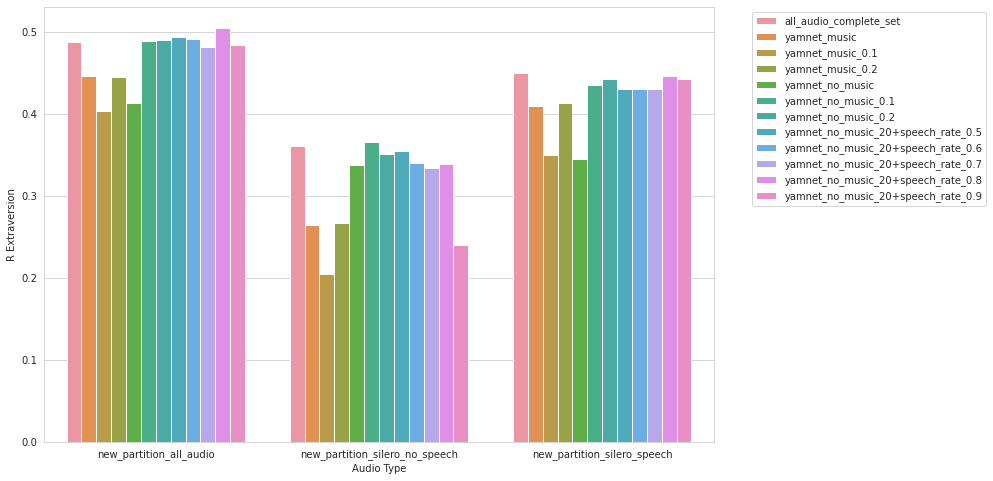

In [81]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=r_E_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Extraversion')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Agreeableness

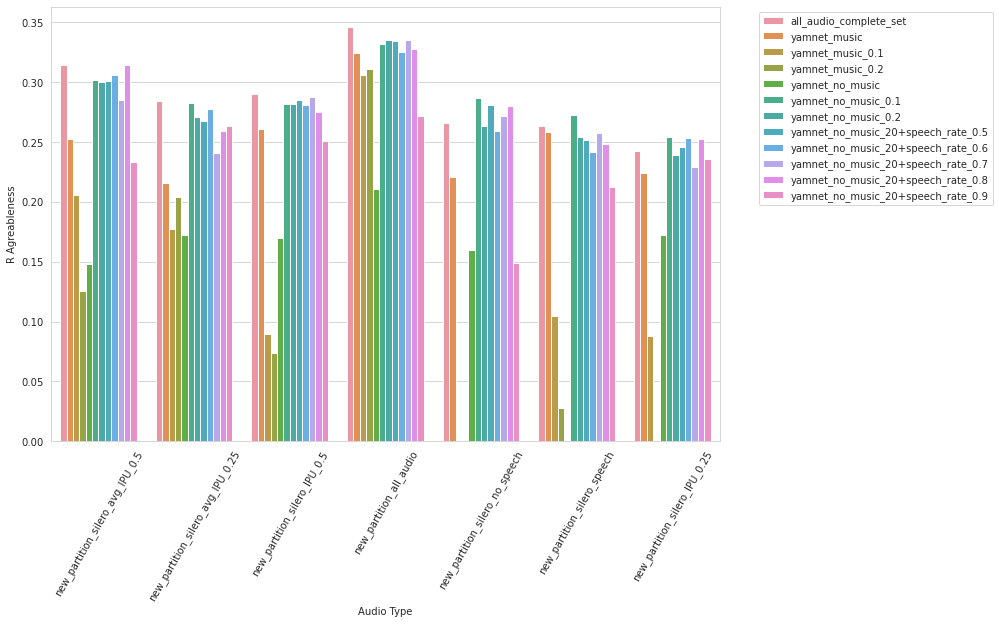

In [111]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=r_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Agreableness')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

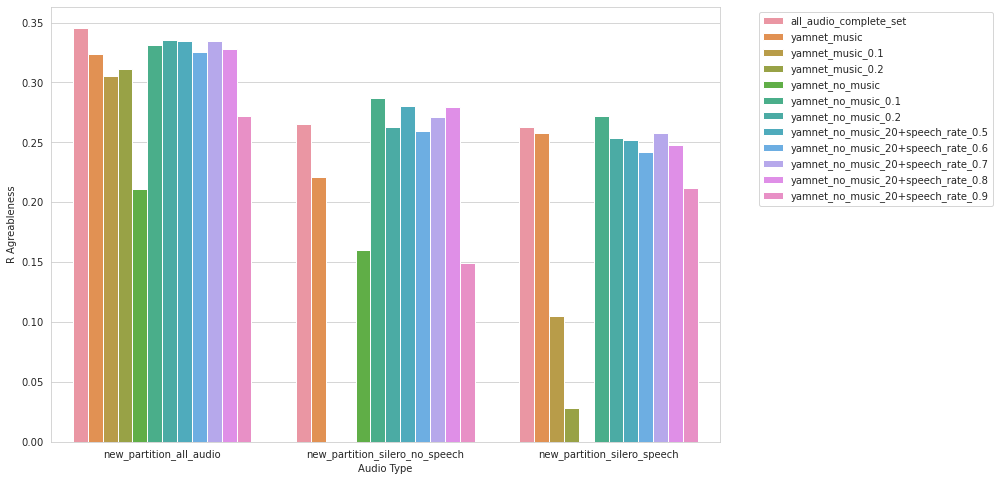

In [82]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=r_A_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Agreableness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

### Neuroticism

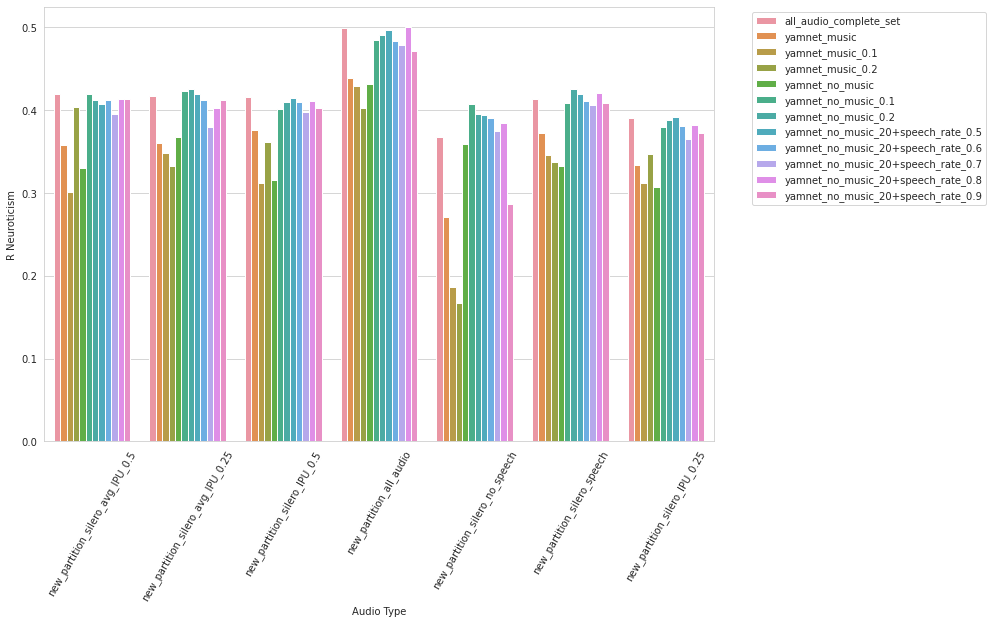

In [112]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=r_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Neuroticism')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

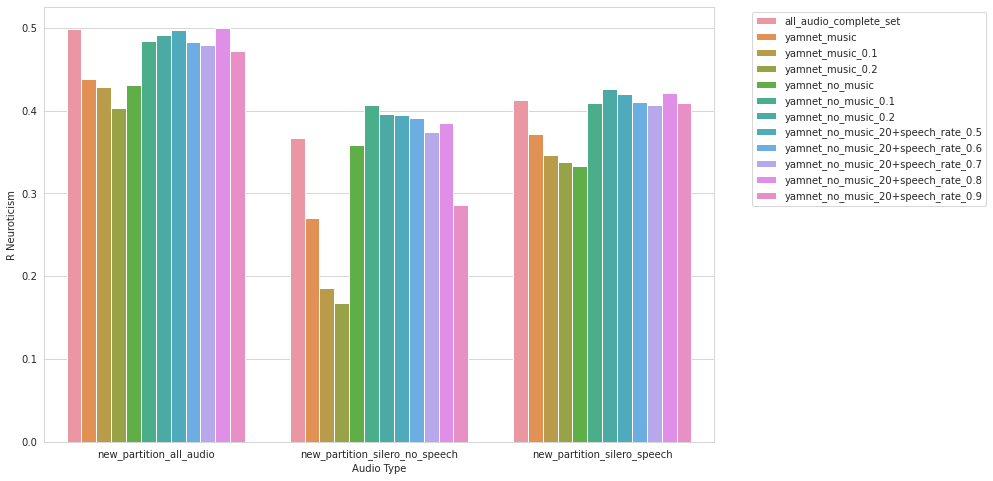

In [83]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=r_N_all_ss_sns,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='R Neuroticism')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## RMSE

In [42]:
RMSE=DF_performance[DF_performance['index']=='RMSE'].drop(columns='index')

RMSE_all=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','A','N'])]
RMSE_O=RMSE.loc[:,~RMSE.columns.isin(['all','C','E','A','N'])]
RMSE_C=RMSE.loc[:,~RMSE.columns.isin(['O','all','E','A','N'])]
RMSE_E=RMSE.loc[:,~RMSE.columns.isin(['O','C','all','A','N'])]
RMSE_A=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','all','N'])]
RMSE_N=RMSE.loc[:,~RMSE.columns.isin(['O','C','E','A','all'])]

### All

(0.12, 0.15015588988687098)

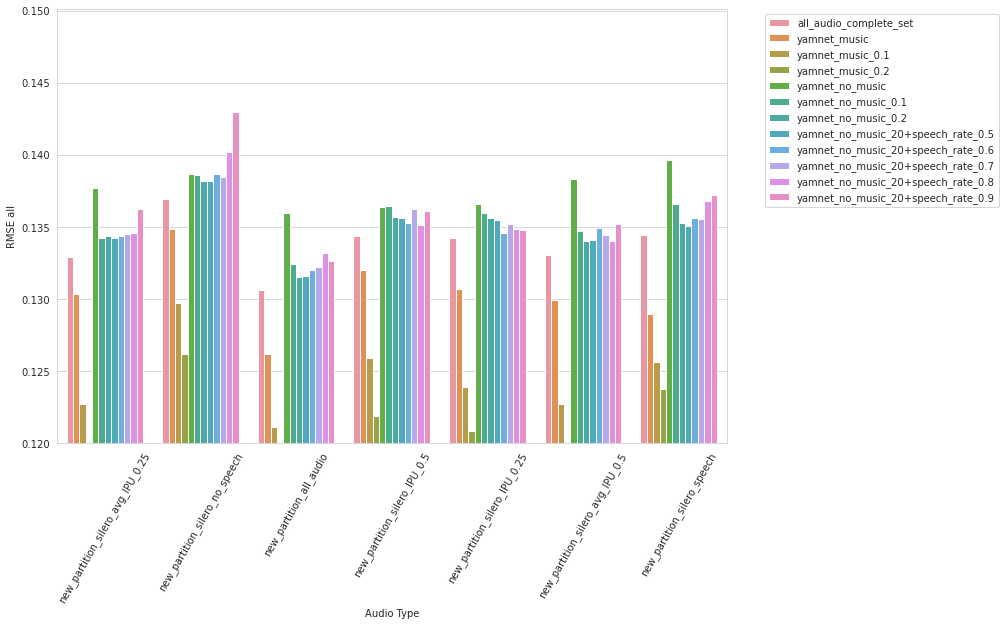

In [113]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=RMSE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE all')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

### Openness

(0.12, 0.1522593662815299)

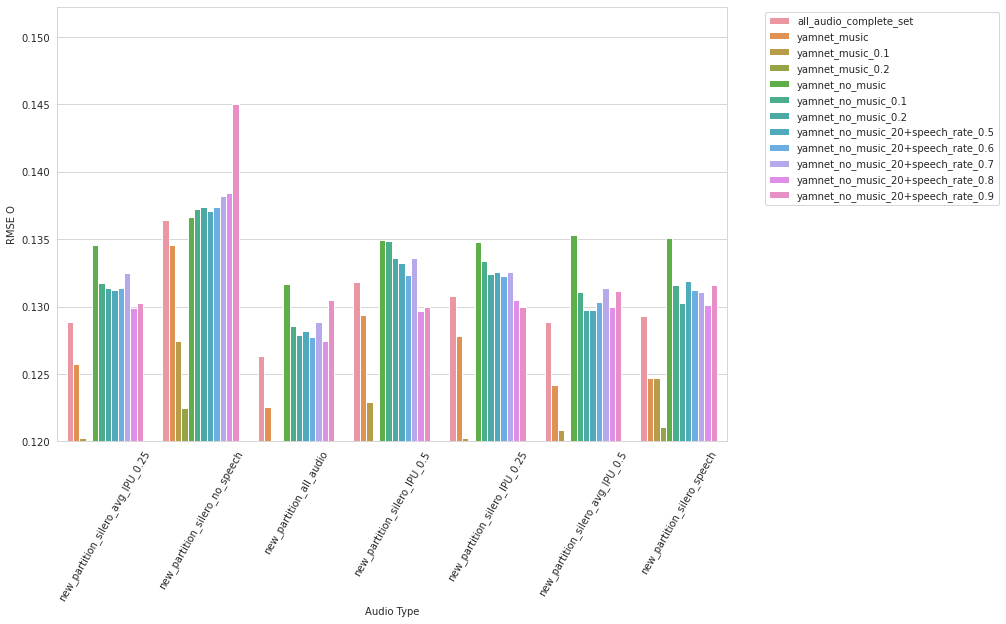

In [114]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=RMSE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE O')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

### Consciencousness

(0.12, 0.16201267909519002)

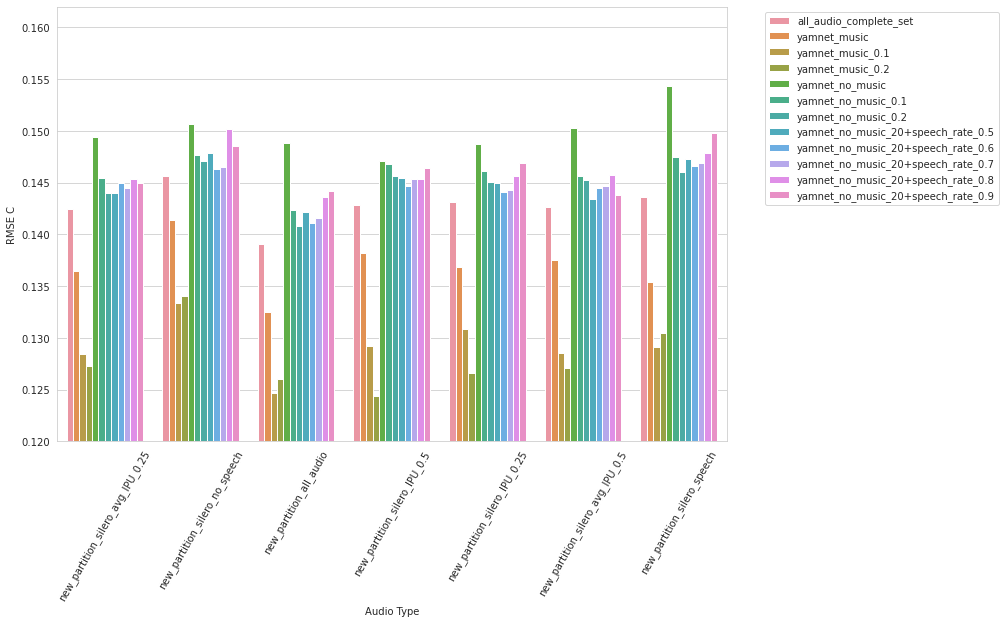

In [115]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=RMSE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE C')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12, )

### Extraversion

(0.12, 0.14905198690268628)

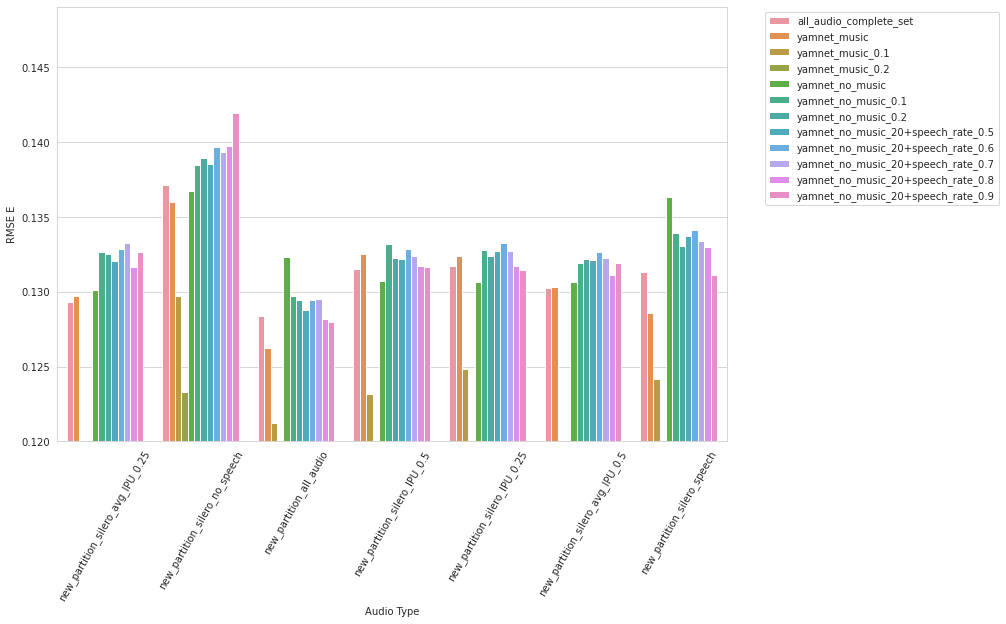

In [116]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=RMSE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE E')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

### Agreeableness

(0.1, 0.14229364408096384)

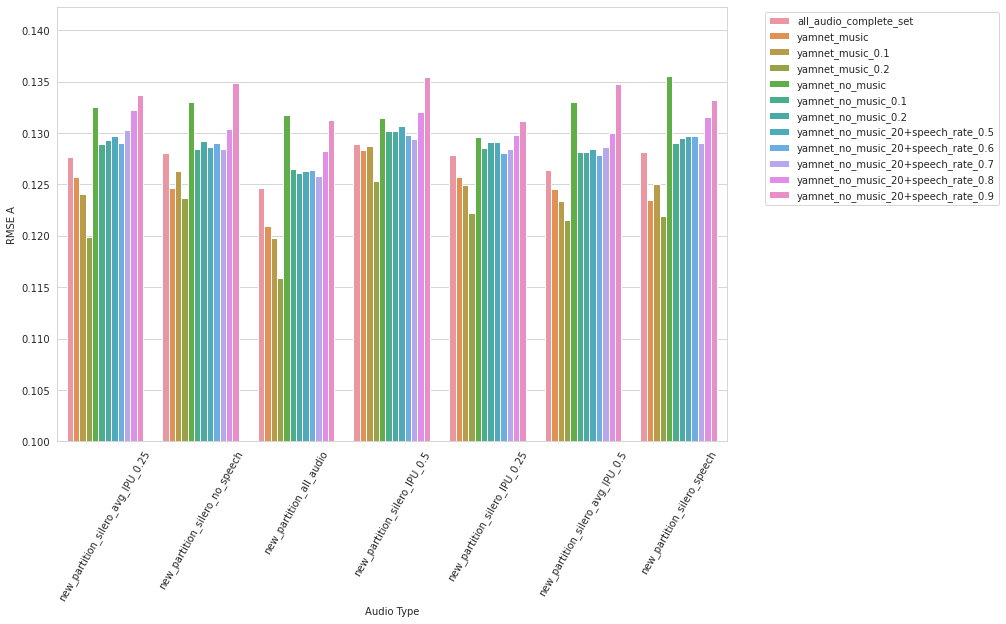

In [117]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=RMSE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE A')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.1,)

### Neuroticism

(0.12, 0.1524929783995596)

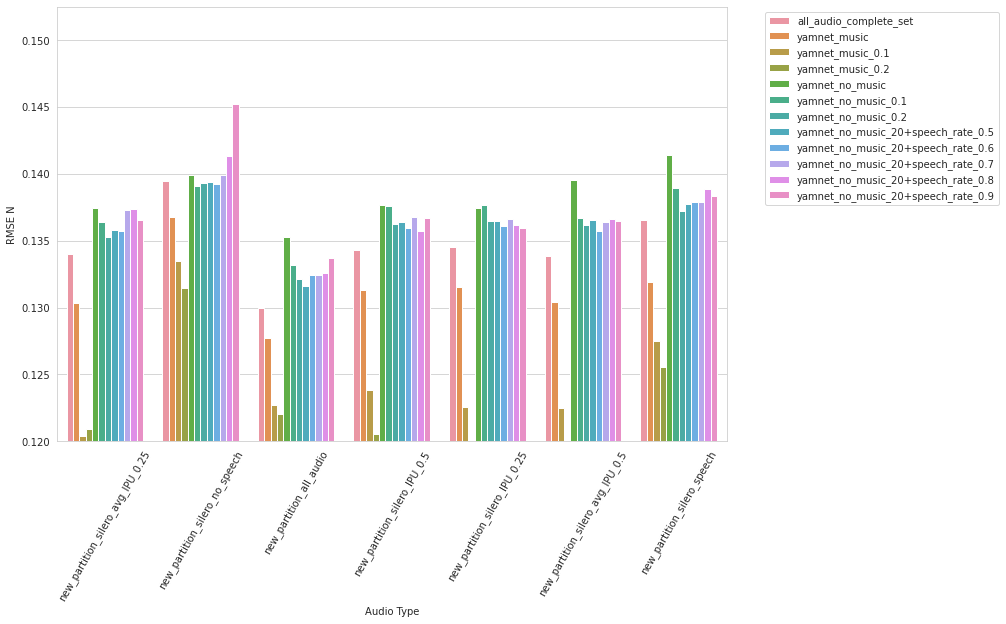

In [118]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=RMSE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='RMSE N')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.12,)

## MAE

In [49]:
MAE=DF_performance[DF_performance['index']=='MAE'].drop(columns='index')

MAE_all=MAE.loc[:,~MAE.columns.isin(['O','C','E','A','N'])]
MAE_O=MAE.loc[:,~MAE.columns.isin(['all','C','E','A','N'])]
MAE_C=MAE.loc[:,~MAE.columns.isin(['O','all','E','A','N'])]
MAE_E=MAE.loc[:,~MAE.columns.isin(['O','C','all','A','N'])]
MAE_A=MAE.loc[:,~MAE.columns.isin(['O','C','E','all','N'])]
MAE_N=MAE.loc[:,~MAE.columns.isin(['O','C','E','A','all'])]

### All

(0.08, 0.1190176878536754)

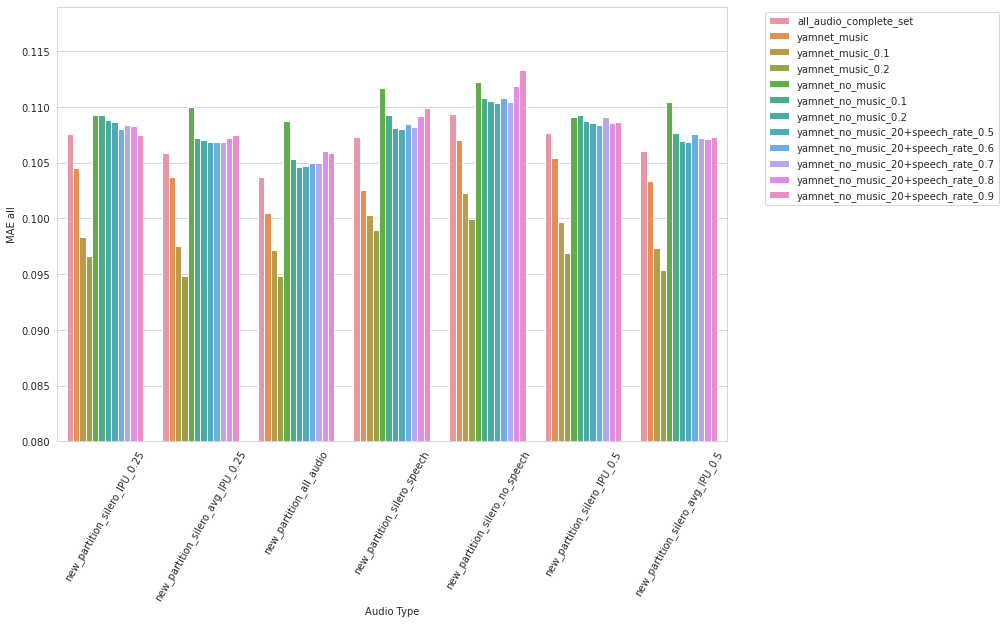

In [119]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=MAE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE all')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08, )

### Openness

(0.08, 0.1217845290492957)

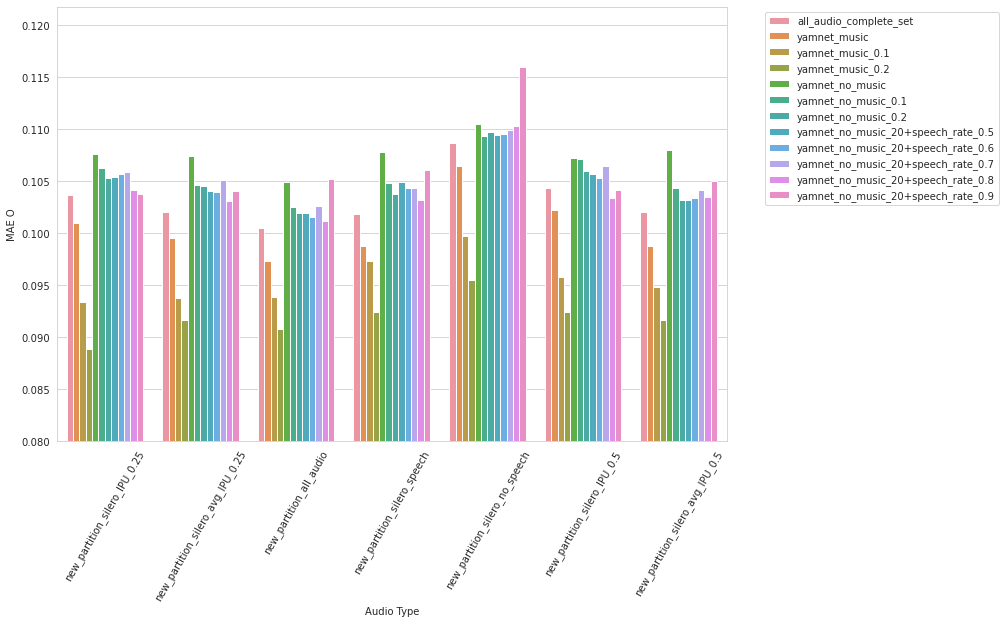

In [120]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=MAE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE O')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

### Conscienciousness

(0.08, 0.1322611165632704)

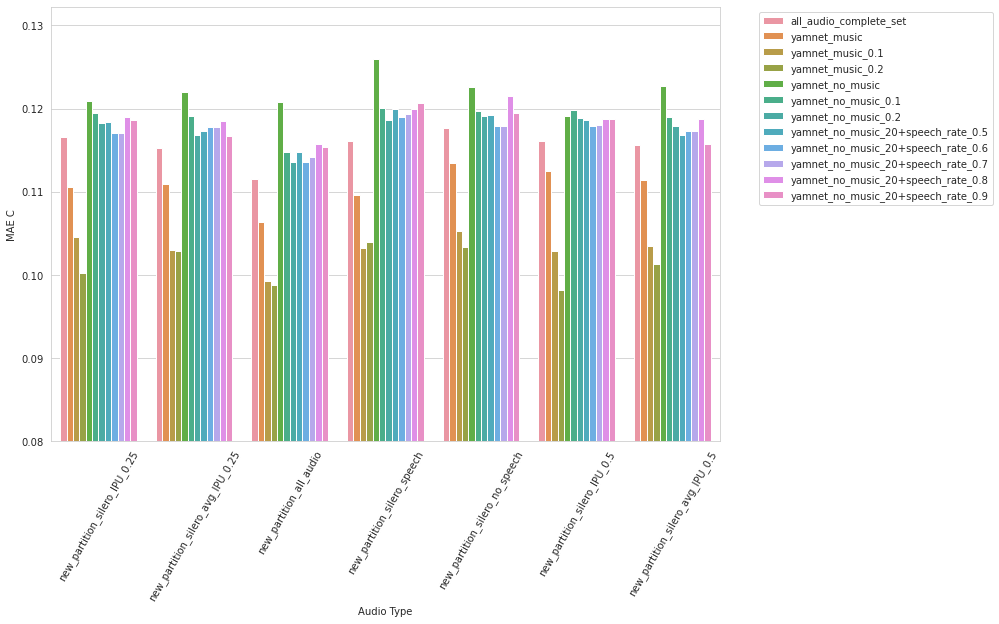

In [121]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=MAE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE C')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

### Extraversion

(0.08, 0.11717775713112231)

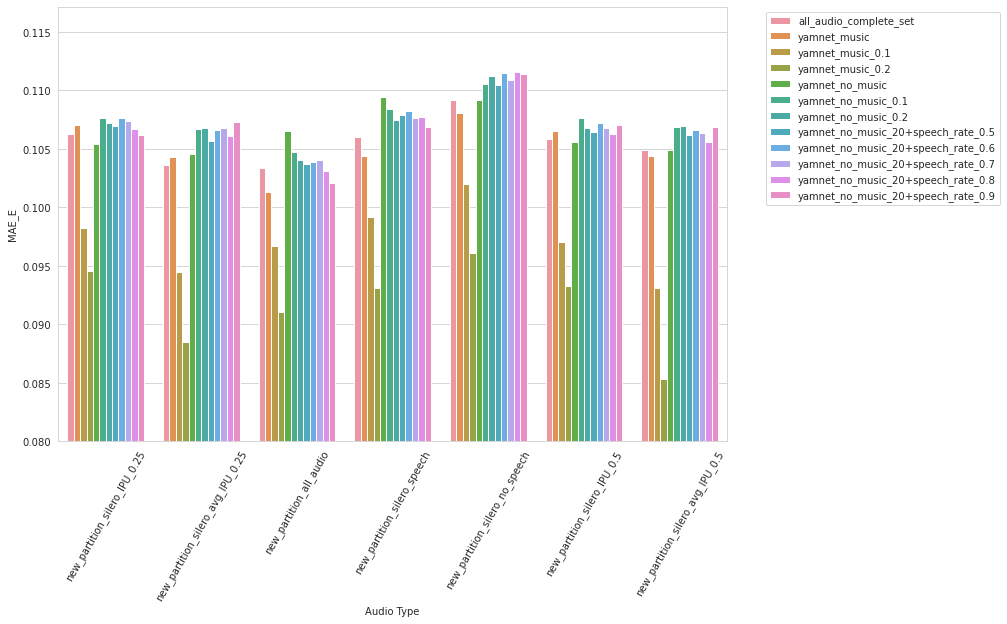

In [122]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=MAE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE_E')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

### Agreeableness

(0.08, 0.11291731463482364)

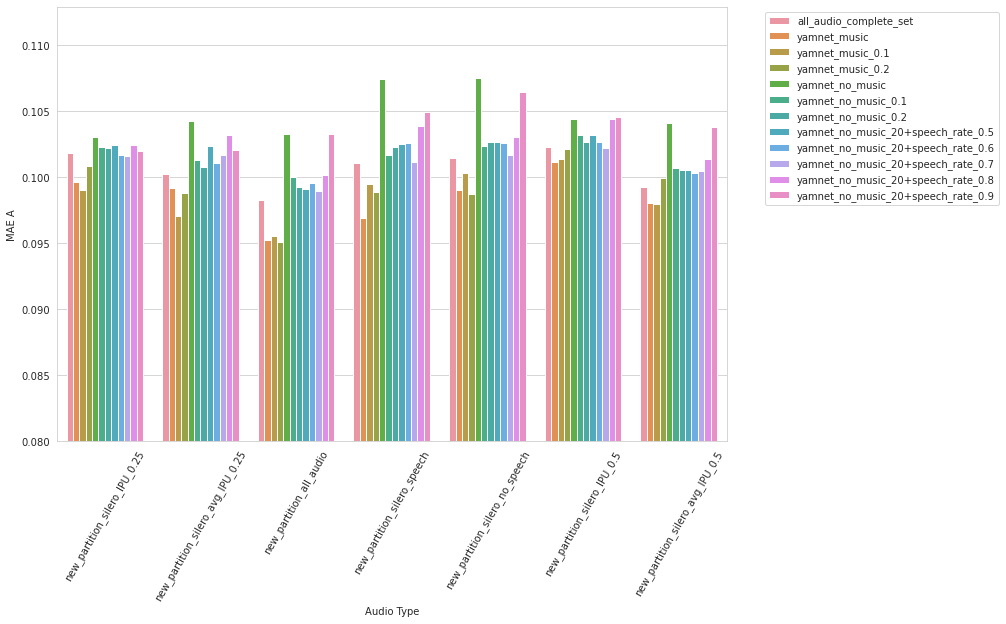

In [123]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=MAE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE A')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08,)

### Neuroticism

(0.08, 0.12179905919894359)

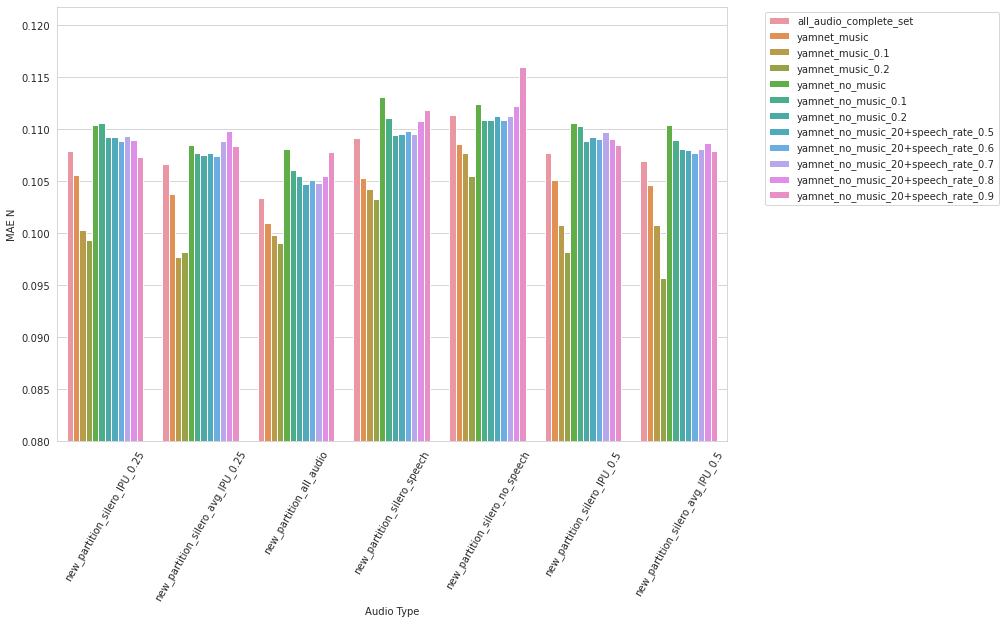

In [124]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=MAE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MAE N')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.08, )

## MSE

In [56]:
MSE=DF_performance[DF_performance['index']=='MSE'].drop(columns='index')

MSE_all=MSE.loc[:,~MSE.columns.isin(['O','C','E','A','N'])]
MSE_O=MSE.loc[:,~MSE.columns.isin(['all','C','E','A','N'])]
MSE_C=MSE.loc[:,~MSE.columns.isin(['O','all','E','A','N'])]
MSE_E=MSE.loc[:,~MSE.columns.isin(['O','C','all','A','N'])]
MSE_A=MSE.loc[:,~MSE.columns.isin(['O','C','E','all','N'])]
MSE_N=MSE.loc[:,~MSE.columns.isin(['O','C','E','A','all'])]

### All

(0.01, 0.02147313454068384)

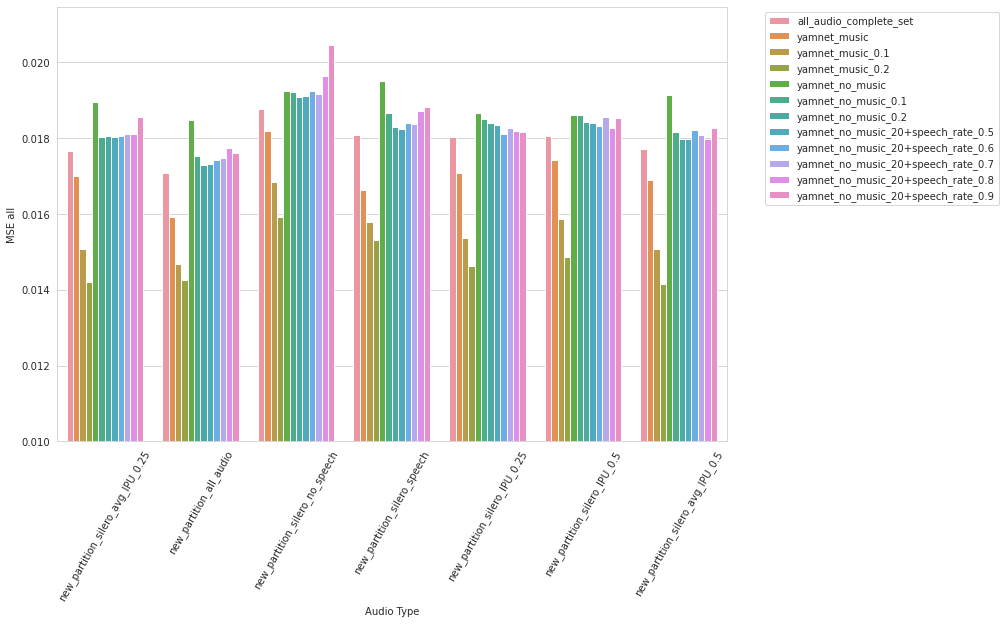

In [125]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="all", hue="experiment", data=MSE_all,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE all')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Openness

(0.01, 0.022078966305193348)

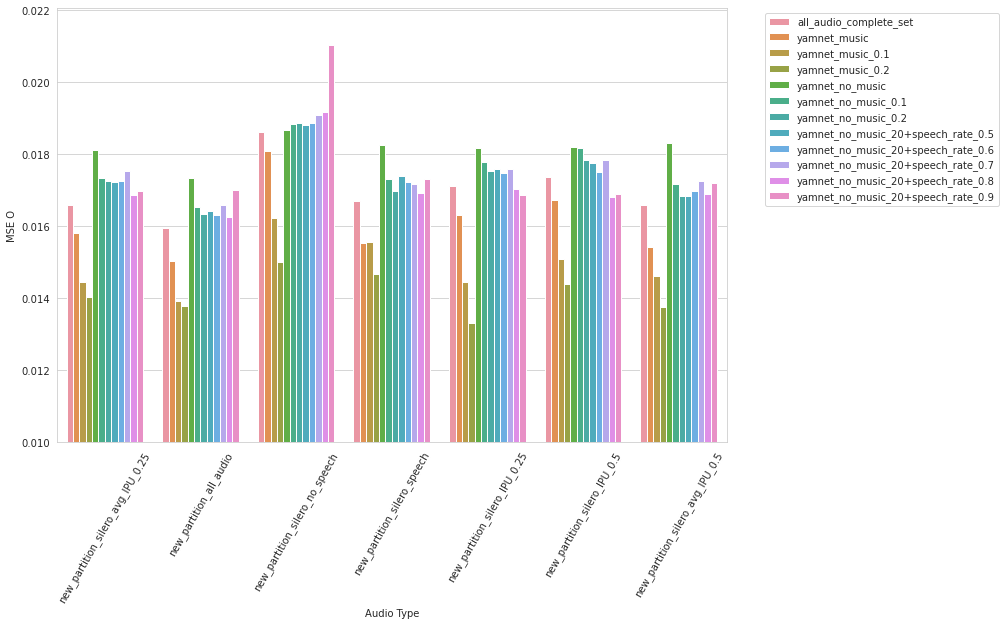

In [126]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="O", hue="experiment", data=MSE_O,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE O')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Conscienciousness

(0.01, 0.02499819827390571)

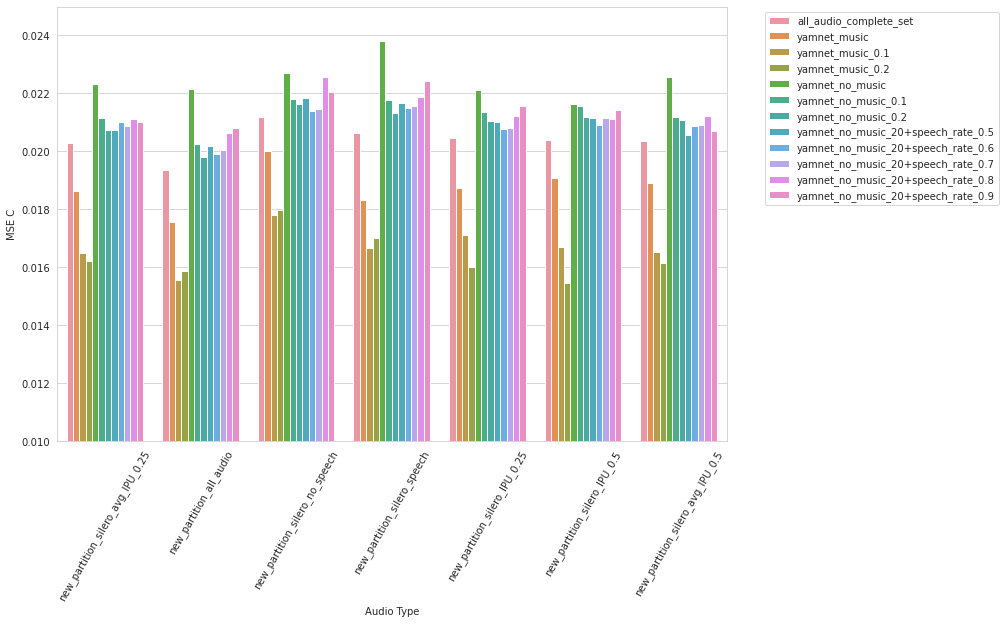

In [127]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="C", hue="experiment", data=MSE_C,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE C')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Extraversion

(0.01, 0.021158566475846203)

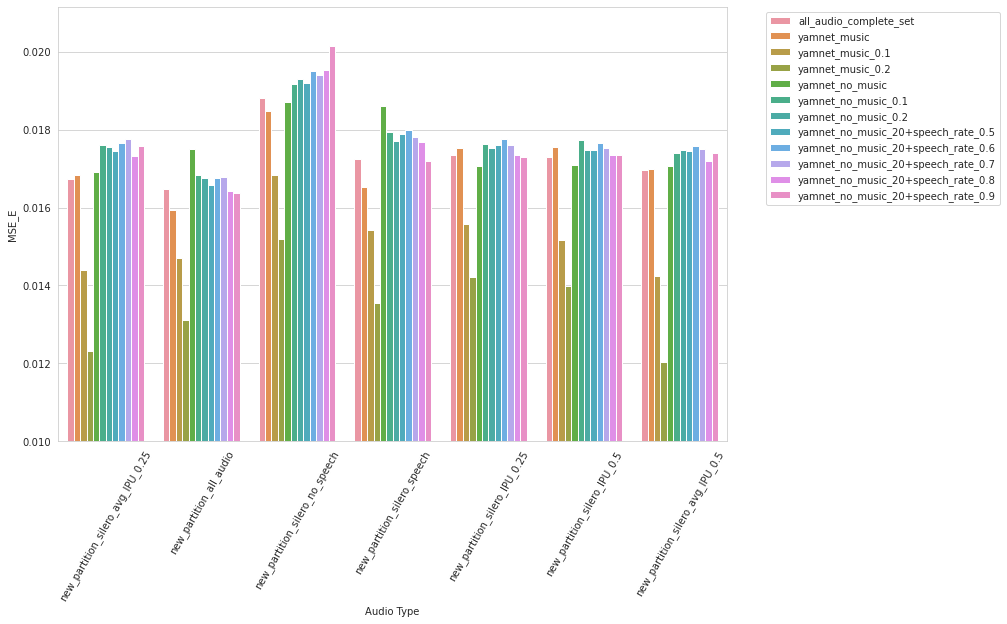

In [128]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="E", hue="experiment", data=MSE_E,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE_E')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Agreeableness

(0.01, 0.01928331537699042)

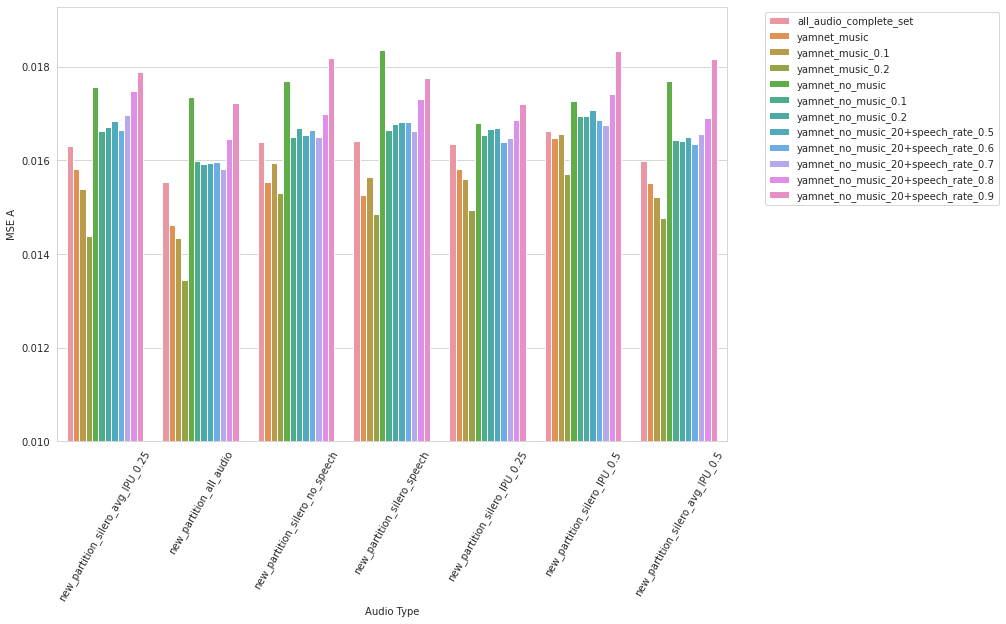

In [129]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="A", hue="experiment", data=MSE_A,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE A')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

### Neuroticism

(0.01, 0.02214676996301763)

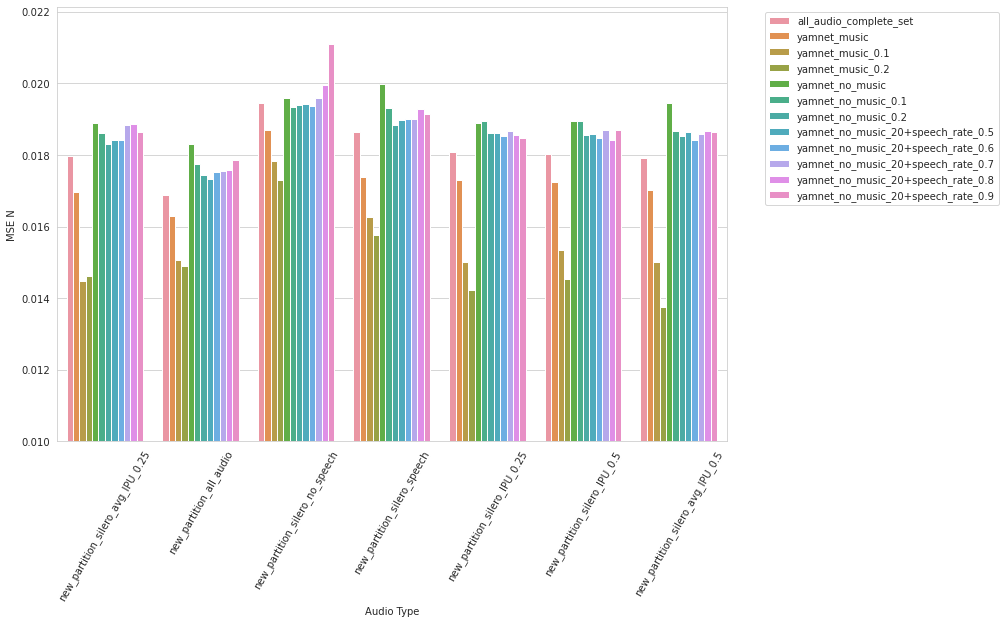

In [130]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.barplot(x="audio_type", y="N", hue="experiment", data=MSE_N,capsize=.1,errwidth=1.4)
ax.set(xlabel='Audio Type', ylabel='MSE N')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0.01,)

# Relevant features

In [63]:
DF_relevant_features

,Unnamed: 0,features,Personality,Importance,audio_type,experiment
0,10,loudness_sma3_amean,O,0.036806,new_partition_silero_no_speech,yamnet_no_music_20+speech_rate_0.8
1,13,loudness_sma3_percentile50.0,O,0.028405,new_partition_silero_no_speech,yamnet_no_music_20+speech_rate_0.8
2,23,mfcc1_sma3_stddevNorm,O,0.026496,new_partition_silero_no_speech,yamnet_no_music_20+speech_rate_0.8
3,25,mfcc2_sma3_stddevNorm,O,0.025418,new_partition_silero_no_speech,yamnet_no_music_20+speech_rate_0.8
4,85,MeanUnvoicedSegmentLength,O,0.094114,new_partition_silero_no_speech,yamnet_no_music_20+speech_rate_0.8
...,...,...,...,...,...,...
17,368,loudness_sma3_meanRisingSlope,N,0.074469,new_partition_silero_avg_IPU_0.25,yamnet_music_0.2
18,371,loudness_sma3_stddevFallingSlope,N,0.025946,new_partition_silero_avg_IPU_0.25,yamnet_music_0.2
19,389,logRelF0-H1-H2_sma3nz_stddevNorm,N,0.027855,new_partition_silero_avg_IPU_0.25,yamnet_music_0.2
20,411,alphaRatioV_sma3nz_stddevNorm,N,0.027843,new_partition_silero_avg_IPU_0.25,yamnet_music_0.2


In [64]:
DF_O=DF_relevant_features[DF_relevant_features['Personality']=='O']
DF_C=DF_relevant_features[DF_relevant_features['Personality']=='C']
DF_E=DF_relevant_features[DF_relevant_features['Personality']=='E']
DF_A=DF_relevant_features[DF_relevant_features['Personality']=='A']
DF_N=DF_relevant_features[DF_relevant_features['Personality']=='N']

List of top ten features in every experiment, for each personality trait

In [65]:
features_O=DF_O.drop_duplicates('features').features.values
features_C=DF_C.drop_duplicates('features').features.values
features_E=DF_E.drop_duplicates('features').features.values
features_A=DF_A.drop_duplicates('features').features.values
features_N=DF_N.drop_duplicates('features').features.values

Feature count 

In [66]:
DF_features_O=pd.DataFrame(columns=['O'])
DF_features_C=pd.DataFrame(columns=['C'])
DF_features_E=pd.DataFrame(columns=['E'])
DF_features_A=pd.DataFrame(columns=['A'])
DF_features_N=pd.DataFrame(columns=['N'])

for (f_O,f_C,f_E,f_A,f_N) in zip(features_O,features_C,features_E,features_A,features_N):
    DF_features_O.loc[f_O]=DF_O[DF_O['features']==f_O].shape[0]
    DF_features_C.loc[f_C]=DF_C[DF_C['features']==f_C].shape[0]
    DF_features_E.loc[f_E]=DF_E[DF_E['features']==f_E].shape[0]
    DF_features_A.loc[f_A]=DF_A[DF_A['features']==f_A].shape[0]
    DF_features_N.loc[f_N]=DF_N[DF_N['features']==f_N].shape[0]

DF_features_O=DF_features_O.sort_values(by='O',ascending=False).reset_index()
DF_features_C=DF_features_C.sort_values(by='C',ascending=False).reset_index()
DF_features_E=DF_features_E.sort_values(by='E',ascending=False).reset_index()
DF_features_A=DF_features_A.sort_values(by='A',ascending=False).reset_index()
DF_features_N=DF_features_N.sort_values(by='N',ascending=False).reset_index()

In [67]:
from functools import reduce 

OCEAN=[DF_features_O,DF_features_C,DF_features_E,DF_features_A,DF_features_N]

features_freq_DF = reduce(lambda left, right:
                     pd.merge(left , right,
                              on = ['index'],
                              how='outer'),
                     OCEAN)

Feature count for every relevant features and personality traits 

In [68]:
features_freq_DF

,index,O,C,E,A,N
0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,66.0,2.0,65.0,NaN,NaN
1,loudness_sma3_meanRisingSlope,57.0,57.0,59.0,53.0,66.0
2,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,54.0,NaN,55.0,NaN,7.0
3,loudness_sma3_stddevRisingSlope,54.0,12.0,47.0,14.0,28.0
4,loudness_sma3_percentile20.0,20.0,16.0,9.0,5.0,9.0
5,F0semitoneFrom27.5Hz_sma3nz_amean,20.0,NaN,51.0,NaN,NaN
6,MeanUnvoicedSegmentLength,20.0,21.0,17.0,20.0,23.0
7,StddevUnvoicedSegmentLength,17.0,25.0,12.0,27.0,22.0
8,loudness_sma3_amean,14.0,NaN,8.0,NaN,NaN
9,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,12.0,NaN,19.0,NaN,NaN


Relevant features in every personality trait 

In [69]:
features_freq_DF.dropna()

,index,O,C,E,A,N
1,loudness_sma3_meanRisingSlope,57.0,57.0,59.0,53.0,66.0
3,loudness_sma3_stddevRisingSlope,54.0,12.0,47.0,14.0,28.0
4,loudness_sma3_percentile20.0,20.0,16.0,9.0,5.0,9.0
6,MeanUnvoicedSegmentLength,20.0,21.0,17.0,20.0,23.0
7,StddevUnvoicedSegmentLength,17.0,25.0,12.0,27.0,22.0
13,slopeUV0-500_sma3nz_amean,6.0,4.0,15.0,8.0,2.0
17,loudnessPeaksPerSec,5.0,25.0,8.0,40.0,33.0
25,loudness_sma3_pctlrange0-2,1.0,1.0,1.0,8.0,5.0
